# Análisis de entropía de los epítopos seleccionados
Para evaluar el grado de conservación y variabilidad en cada posición aminoacídica de
las secuencias que representan los epítopos de los linfocitos T y B dentro de las proteínas
objetivo, se midió la Entropía de Shannon (*Shannon, 1997*) usando la herramienta en línea ‘**Shannon Entropy-One**’ (https://www.hiv.lanl.gov/content/sequence/ENTROPY/entropy_one.html).

Como archivo de entrada se utilizaron 476 secuencias aminoacídicas, correspondientes a la poliproteína del genoma del DENV-2, obtenidas de la base de datos del ‘**Virus Pathogen Database and Analysis Resource**’ - **ViPR** (https://legacy.viprbrc.org/brc/home.spg?decorator=vipr) (*Pickett et al., 2012*). Tales secuencias son procedentes de Sudamérica y tienen una longitud mínima de 10 000 pb. De igual manera, antes de realizarles el analisis de entropía, todas las secuencias fueron alineadas con el servidor *CLUSTALW* (http://www.clustal.org/clustal2/) (*Thompson et al., 2002*) con los parámetros predeterminados. 

### - Recuperación de 476 secuencias aminoacídicas de DENV-2 (ViPR)

In [1]:
# Instalar el paquete 'selenium'
!pip install selenium

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Importar los módulos necesarios de 'selenium'
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import Select
import time

In [4]:
# Establecer la ubicación del WebDriver
s = Service('/usr/local/bin/chromedriver')

In [35]:
# Inicializar el Selenium WebDriver
driver = webdriver.Chrome(service = s)

# Visitar la sección 'Protein Search' de la base de datos del ViPR
driver.get('https://www.bv-brc.org/searches/ProteinSearch')
time.sleep(2)


# Editar los parámetros
## Definir el nombre del taxón
taxon_name = driver.find_element(by = By.XPATH, value = '/html/body/div[1]/form/div/div[2]/div[2]/div[4]/div/div/div[3]/input[1]')

## Definir el grupo geográfico
geographic_group = driver.find_element(by = By.XPATH, value = '/html/body/div[1]/form/div/div[2]/div[2]/div[12]/div/div/div[3]/input[1]')

## Filtrar el mínimo de longitud
min_long = driver.find_element(by = By.XPATH, value = '/html/body/div[1]/form/div/div[2]/div[3]/div[8]/div/div/div[4]/div[1]/div/input')
max_long = driver.find_element(by = By.XPATH, value = '/html/body/div[1]/form/div/div[2]/div[3]/div[8]/div/div/div[4]/div[2]/div/input')


# Realizar la búsqueda de secuencias aminoacídicas de la poliproteína del genoma del DENV-2
taxon_name.send_keys('Dengue virus type 2')
time.sleep(3)
driver.find_element(by = By.XPATH, value = '/html/body/div[11]/div/div[5]').click()
geographic_group.send_keys('South America')
driver.find_element(by = By.XPATH, value = '/html/body/div[1]/form/div/div[2]/div[3]/div[8]/div/div/div[2]/table/tbody/tr/td[2]').click()
time.sleep(1)
driver.find_element(by = By.XPATH, value = '/html/body/div[12]/table/tbody/tr[16]/td[2]').click()
time.sleep(1)
min_long.send_keys('10000')
max_long.send_keys('100000')

## Entregar la data
driver.find_element(by = By.XPATH, value = '/html/body/div[1]/form/div/div[3]/div/span[2]').click()
time.sleep(10)

## Obtener el análisis
get_url = driver.current_url

driver.find_element(by = By.XPATH, value = '/html/body/div[1]/div[3]/div[3]/div[3]/div[2]/div/div[6]/div[1]/table/tr/th[1]').click()
time.sleep(2)
driver.find_element(by = By.XPATH, value = '/html/body/div[1]/div[3]/div[3]/div[3]/div[2]/div/div[3]/div[3]/div[1]').click()
time.sleep(1)
driver.find_element(by = By.XPATH, value = '/html/body/div[15]/div/div[1]/div/div/div/table/tr[1]/td[3]/div[2]').click()
time.sleep(3)


print('All DENV-2 sequences downloaded!')
    
driver.close()

All DENV-2 sequences downloaded!


### - Alineamiento de las secuencias aminoacídicas (ClustalW)

In [39]:
# Importar el módulo 'ClustalWCommandline' de 'Bio', y el paquete 'os'
import Bio
from Bio.Align.Applications import ClustalwCommandline

In [40]:
# Ejecutar ClustalW
import os
clustalw_exe = r'/home/victor/Escritorio/Tesis/RESULTADOS/8. Análisis de entropía de los epítopos seleccionados/clustalw2'
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = 'Secuencias_aminoacídicas.fasta')
assert os.path.isfile(clustalw_exe), 'Clustal_W executable is missing'
stdout, stderr = clustalw_cline()
print(clustalw_cline)

"/home/victor/Escritorio/Tesis/RESULTADOS/8. Análisis de entropía de los epítopos seleccionados/clustalw2" -infile=Secuencias_aminoacídicas.fasta


In [55]:
# Generar el output del alineamiento
from Bio import AlignIO
ClustalAlign = AlignIO.read('Secuencias_aminoacídicas.aln', 'clustal')
print(ClustalAlign)

Alignment with 477 rows and 3391 columns
MNNQRKKARNTPFNMLKRERNRVSTVQQLTKRFSLGMLQGRGPL...VLW sp|Q9WDA6|POLG_DEN2Q__strain
MNNQRKKARNTPFNMLKRERNRVSTVQQLTKRFSLGMLQGRGPL...VLW fig|11060.10506.peg.1|
MNNQRKKARNTPFNMLKRERNRVSTVQQLTKRFSLGMLQGRGPL...VLW fig|11060.2608.CDS.1|
MNNQRKKARNTPFNMLKRERNRVSTVQQLTKRFSLGMLQGRGPL...VLW fig|11060.2614.CDS.1|
MNNQRKKARNTPFNMLKRERNRVSTVQQLTKRFSLGMLQGRGPL...VLW fig|11060.12003.peg.1|
MNNQRKKARNTPFNMLKRERNRVSTVQQLTKRFSLGMLQGRGPL...VLW fig|11060.12006.peg.1|
MNNQRKKARNTPFNMLKRERNRVSTVQQLTKRFSLGMLQGRGPL...VLW fig|11060.12004.peg.1|
MNNQRKKARNTPFNMLKRERNRVSTVQQLTKRFSLGMLQGRGPL...VLW fig|11060.11881.peg.1|
MNNQRKKARNTPFNMLKRERNRVSTVQQLTKRFSLGMLQGRGPL...VLW fig|11060.11882.peg.1|
MNNQRKKARNTPFNMLKRERNRVSTVQQLTKRFSLGMLQGRGPL...VLW fig|11060.11989.peg.1|
MNNQRKKARNTPFNMLKRERNRVSTVQQLTKRFSLGMLQGRGPL...VLW fig|11060.12007.peg.1|
MNNQRKKARNTPFNMLKRERNRVSTVQQLTKRFSLGMLQGRGPL...VLW fig|11060.12008.peg.1|
MNNQRKKARNTPFNMLKRERNRVSTVQQLTKRFSLGMLQGRGPL...VLW fig|11060.12005.

In [69]:
# Obtener y guardar matriz de distancia a partir de las secuencias alineadas
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
calculator = DistanceCalculator('identity')
distMatrix = calculator.get_distance(ClustalAlign)
print(distMatrix)

matriz_distancia = '/home/victor/Escritorio/Tesis/RESULTADOS/8. Análisis de entropía de los epítopos seleccionados/Matriz_Distancias'
with open(matriz_distancia, 'a') as file:
    print(distMatrix, file = file)

sp|Q9WDA6|POLG_DEN2Q__strain    0.000000
fig|11060.10506.peg.1|  0.000000    0.000000
fig|11060.2608.CDS.1|   0.004718    0.004718    0.000000
fig|11060.2614.CDS.1|   0.007667    0.007667    0.005898    0.000000
fig|11060.12003.peg.1|  0.033324    0.033324    0.033618    0.035093    0.000000
fig|11060.12006.peg.1|  0.033324    0.033324    0.033618    0.035093    0.000590    0.000000
fig|11060.12004.peg.1|  0.033029    0.033029    0.033324    0.034798    0.000885    0.000885    0.000000
fig|11060.11881.peg.1|  0.032734    0.032734    0.033029    0.034503    0.001180    0.001180    0.001474    0.000000
fig|11060.11882.peg.1|  0.032734    0.032734    0.033029    0.034503    0.001769    0.001769    0.002064    0.001180    0.000000
fig|11060.11989.peg.1|  0.032144    0.032144    0.032439    0.033913    0.001180    0.001180    0.001474    0.000590    0.000590    0.000000
fig|11060.12007.peg.1|  0.033324    0.033324    0.033618    0.035093    0.002949    0.002949    0.003244    0.002359    0.

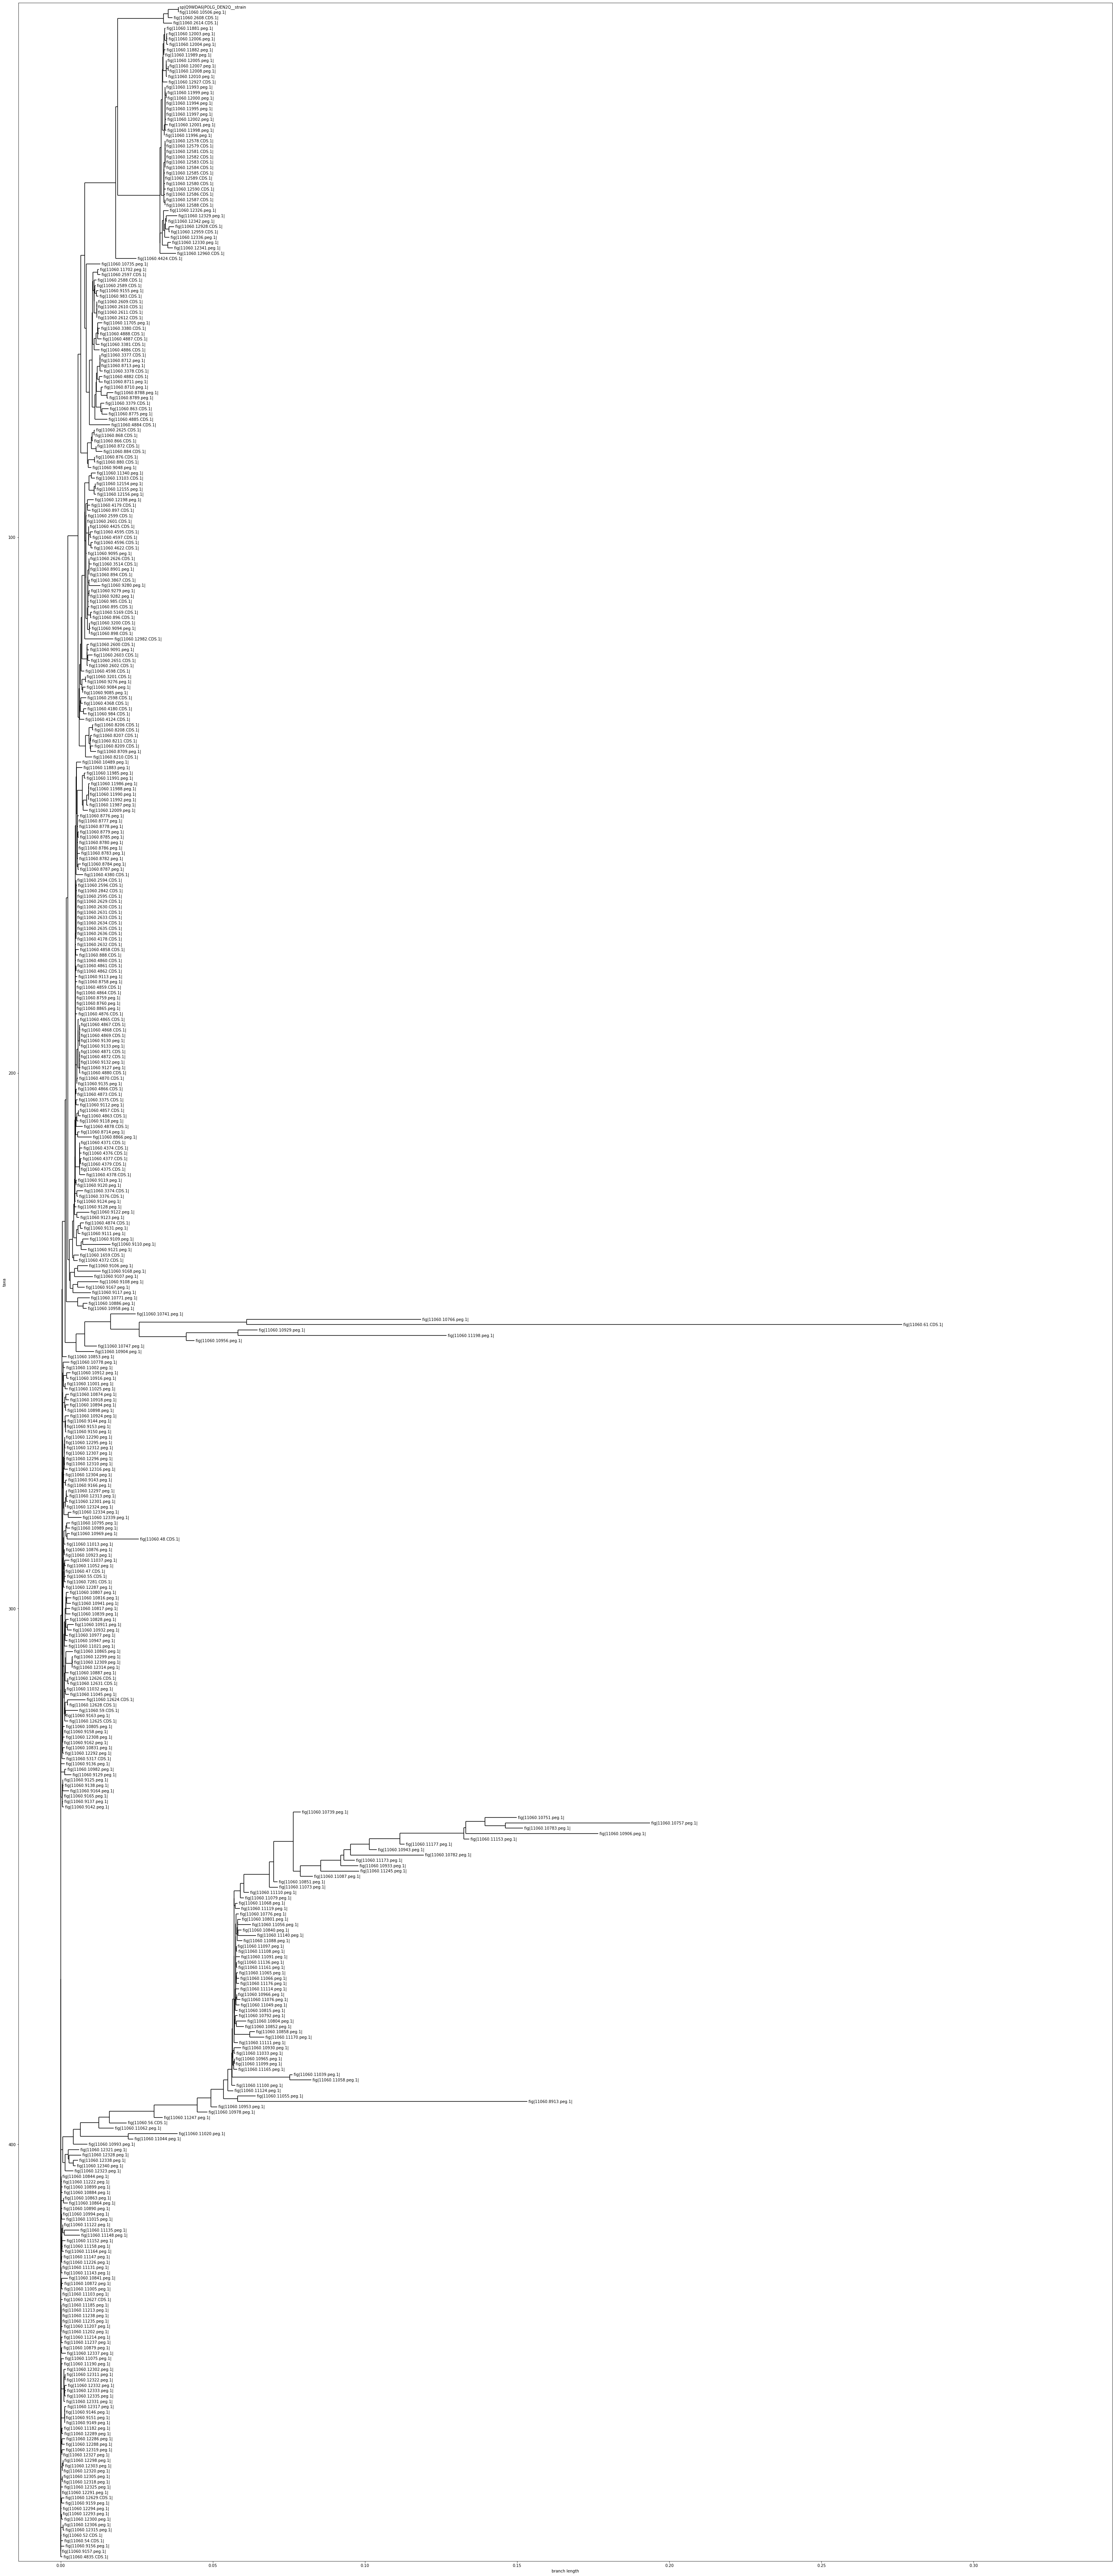

In [75]:
# Producir un dendograma 
from Bio import Phylo
import matplotlib.pyplot as plt
tree = Phylo.read('Secuencias_aminoacídicas.dnd', 'newick')

fig, ax = plt.subplots(1, 1, figsize = (50, 120))
Phylo.draw(tree, axes = ax, do_show = False)
plt.savefig('Árbol_filogenético.pdf')

### - Evaluación de conservación y variabilidad de las secuencias aminoacídicas (Shannon Entropy-One)

In [3]:
# Establecer la ubicación del WebDriver
s = Service('/usr/local/bin/chromedriver')

In [4]:
# Inicializar el Selenium WebDriver
driver = webdriver.Chrome(service = s)

# Visitar la herramienta en línea 'Shannon Entropy-One'
driver.get('https://www.hiv.lanl.gov/content/sequence/ENTROPY/entropy_one.html')
time.sleep(2)


# Editar los parámetros
## Archivo con las secuencias alineadas
input_file = driver.find_element(by = By.NAME, value = 'FILESEQ_2')

## Opción de calcular las frecuencias de AA en cada posición
frequency = driver.find_element(by = By.NAME, value = 'FREQUENCY')

## Opción de tratar los posibles sitios de glicosilación ligados a N
glyco_sites = driver.find_element(by = By.NAME, value = 'nxst')


# Realizar el cálculo de entropía en cada posición aminoacídica de las secuencias
input_file.send_keys('/home/victor/Escritorio/Tesis/RESULTADOS/8. Análisis de entropía de los epítopos seleccionados/Secuencias_alineadas_476.fasta')
frequency.click()
glyco_sites.click()

## Entregar la data
driver.find_element(by = By.NAME, value = 'Submit').click()
time.sleep(6)

## Obtener los resultados del análisis
get_url = driver.current_url
driver.find_element(by = By.XPATH, value = '/html/body/div[1]/div[5]/table[2]/tbody/tr/td/a[1]').click()

table_output = driver.find_element(By.XPATH, '/html/body/div[1]/div[5]/div[2]/table[1]/tbody').text
print(table_output)

print('Entropy analysis successfully finished!')
    
driver.close()

Position 1st seq in input set Entropy
1 M 0.058
2 N 0.049
3 N 0.049
4 Q 0.027
5 R 0.015
6 K 0.015
7 K 0.030
8 A 0.015
9 R 0.272
10 N 0.337
11 T 0.073
12 P 0.015
13 F 0.000
14 N 0.000
15 M 0.000
16 L 0.000
17 K 0.058
18 R 0.000
19 E 0.000
20 R 0.000
21 N 0.000
22 R 0.000
23 V 0.000
24 S 0.000
25 T 0.015
26 V 0.015
27 Q 0.000
28 Q 0.000
29 L 0.000
30 T 0.000
31 K 0.000
32 R 0.000
33 F 0.000
34 S 0.000
35 L 0.015
36 G 0.000
37 M 0.000
38 L 0.000
39 Q 0.000
40 G 0.000
41 R 0.015
42 G 0.000
43 P 0.000
44 L 0.000
45 K 0.000
46 L 0.000
47 F 0.000
48 M 0.000
49 A 0.000
50 L 0.038
51 V 0.000
52 A 0.000
53 F 0.000
54 L 0.015
55 R 0.000
56 F 0.000
57 L 0.000
58 T 0.000
59 I 0.015
60 P 0.000
61 P 0.000
62 T 0.000
63 A 0.027
64 G 0.000
65 I 0.000
66 L 0.000
67 K 0.000
68 R 0.000
69 W 0.000
70 G 0.000
71 T 0.000
72 I 0.000
73 K 0.000
74 K 0.000
75 S 0.000
76 K 0.000
77 A 0.000
78 I 0.000
79 N 0.000
80 V 0.015
81 L 0.000
82 R 0.038
83 G 0.000
84 F 0.000
85 R 0.015
86 K 0.015
87 E 0.000
88 I 0.000
89 

Los epítopos que pasaron por sitios muy variables se descartaron.